Found 1015 files belonging to 2 classes.
Using 812 files for training.
Using 203 files for validation.
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 72s 3s/step - accuracy: 0.9785 - loss: 0.3424 - val_accuracy: 0.9803 - val_loss: 0.1632
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9869 - loss: 0.1114 - val_accuracy: 0.9803 - val_loss: 0.1057
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9799 - loss: 0.1297 - val_accuracy: 0.9803 - val_loss: 0.1490
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9837 - loss: 0.1263 - val_accuracy: 0.9803 - val_loss: 0.0991
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9800 - loss: 0.1148 - val_accuracy: 0.9803 - val_loss: 0.1262
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.9837 - loss: 0.1091 - val_accuracy: 0.9803 - val_loss: 0.1373
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9837 - loss: 0.1160 - val_accuracy: 0.9803 - val_loss: 0.0969
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.9772 - loss: 0.1173 - val_accuracy: 0.9803 - val_loss: 0.1111
Epo

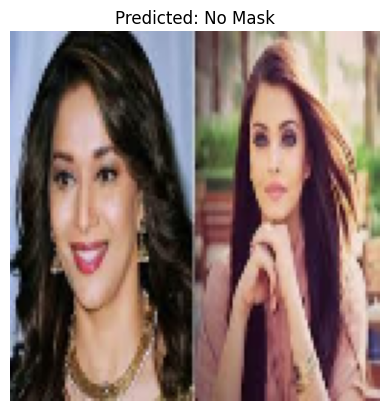

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os

# Dataset link (you'll need to manually download and unzip this in practice)
# Example dataset structure:
# dataset/
# ├── with_mask/
# └── without_mask/
dataset_dir = "/content/drive/MyDrive/dataset"  # Replace with actual path

# Load dataset using image_dataset_from_directory
dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    image_size=(128, 128),                         # Resize all images to 128x128
    batch_size=32,                                 # Batch size
    label_mode='int',                              # Integer labels (0 or 1)
    validation_split=0.2,                          # 80-20 split
    subset="both",                                 # Load both train and val splits
    seed=42
)

train_ds, val_ds = dataset                         # Unpack training and validation sets

# Prefetch for performance
train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

# Define the custom CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(128, 128, 3)),   # Normalize pixel values
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')                 # Binary classification
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_ds, validation_data=val_ds, epochs=10)

# Example prediction (optional)
for images, labels in val_ds.take(1):                              # Take one batch
    preds = model.predict(images)                                  # Get predictions
    plt.imshow(images[0].numpy().astype("uint8"))
    plt.title(f"Predicted: {'Mask' if preds[0] < 0.5 else 'No Mask'}")
    plt.axis('off')
    plt.show()
    break